今回は0,1で線がある、ないを判断していた。

0->線がつながって

1->線がつながっている

今回は線の有無だけでなく、線の距離も情報を上乗せる。

0->線がつながっていない
0<n<1->線がつながっていて、距離を表している。

今回のプログラムでは、表示した少数を用いて、長さも同期して表示してみる

In [2]:
import sqlite3
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def NetworkX(df):
    G = nx.DiGraph()

    # ノードを追加
    nodes = df.columns
    for node in nodes:
        G.add_node(node)

    # エッジを追加
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            distance = df.iloc[i, j]
            if i == j:
                None
            if distance != 0.0:
                G.add_edge(nodes[i], nodes[j], weight=distance)  # 距離をエッジの属性として追加

    # ネットワーク図を描画
    pos = nx.spring_layout(G)  # レイアウトを設定
    edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
    
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # エッジのラベルを表示
    plt.title("Network Graph")
    plt.show()


def SQL_SetUp(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データベースファイルが存在する場合は処理を終了
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    existing_tables = cursor.fetchall()
    if existing_tables:
        print("Database already exists. Exiting setup.")
        conn.close()
        return

    # テーブルを作成
    cursor.execute('''
        CREATE TABLE knowledge (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            data TEXT,
            Adata FLOAT,
            Bdata FLOAT,
            Cdata FLOAT,
            Ddata FLOAT,
            Edata FLOAT,
            Fdata FLOAT
        )
    ''')

    # 配列の定義   
    data = [["Adata",0.2, 0.2, 0.2, 0, 0, 0],
            ["Bdata",0.2, 0.4, 0.1, 0.4, 0.4, 0],
            ["Cdata",0.2, 0.1, 0.6, 0, 0, 0.6],
            ["Ddata",0, 0.4, 0, 0.8, 0, 0],
            ["Edata",0, 0.4, 0, 0, 1.0, 0],
            ["Fdata",0, 0, 0.6, 0, 0, 1.0]]
    
    # データを挿入
    cursor.executemany("INSERT INTO knowledge (data, Adata, Bdata, Cdata, Ddata, Edata, Fdata) VALUES (?, ?, ?, ?, ?, ?, ?)", data)

    conn.commit()
    conn.close()


def SQL_GetData(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データを取得してDataFrameに格納
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    df = pd.DataFrame(rows, columns=columns)

    conn.close()

    # "data"列をデータフレームのインデックスに設定
    df.set_index("data", inplace=True)
    # 不要な"id"列を削除
    df.drop("id", axis=1, inplace=True)

    return df


       Adata  Bdata  Cdata  Ddata  Edata  Fdata
data                                           
Adata    0.2    0.2    0.2    0.0    0.0    0.0
Bdata    0.2    0.4    0.1    0.4    0.4    0.0
Cdata    0.2    0.1    0.6    0.0    0.0    0.6
Ddata    0.0    0.4    0.0    0.8    0.0    0.0
Edata    0.0    0.4    0.0    0.0    1.0    0.0
Fdata    0.0    0.0    0.6    0.0    0.0    1.0


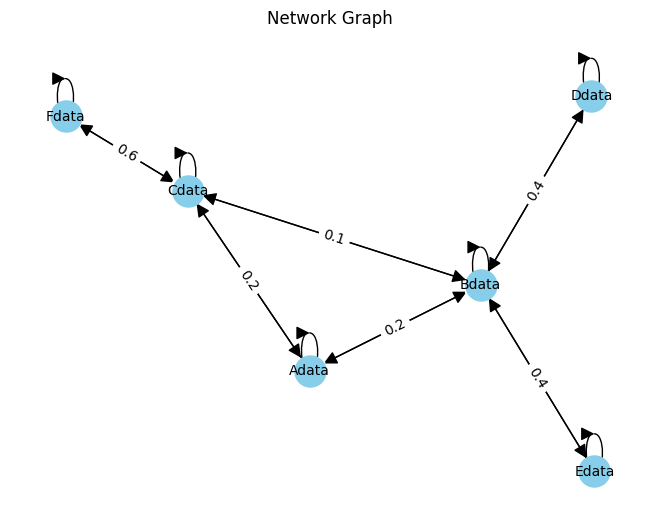

In [6]:
# データベースのセットアップ
SQL_SetUp("database_v03.sqlite")

# データの取得
df = SQL_GetData("database_v03.sqlite")

# データの表示
print(df)

# データの可視化
NetworkX(df)